In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/breadbasket.csv")

In [3]:
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [4]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [6]:
data.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [7]:
data["DateTime"] = pd.to_datetime(data["Date"]+" "+data["Time"])
data.head()

,Date,Time,Transaction,Item,DateTime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [8]:
data.dtypes

Date                   object
Time                   object
Transaction             int64
Item                   object
DateTime       datetime64[ns]
dtype: object

In [9]:
data = data.iloc[:,2:]

In [10]:
data

,Transaction,Item,DateTime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57
...,...,...,...
21288,9682,Coffee,2017-04-09 14:32:58
21289,9682,Tea,2017-04-09 14:32:58
21290,9683,Coffee,2017-04-09 14:57:06
21291,9683,Pastry,2017-04-09 14:57:06


In [11]:
data["Item"].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [12]:
groups = {
    "beverage":['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    "kids":["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    "snacks":['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    "bread":['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    "breakfast_pastry":['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    "dessert":['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    "condiments":['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    "breakfast":['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    "lunch":['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

In [13]:
def chooseCategory(prod):
    for cat, lst in groups.items():
        if prod in lst:
            return cat
    return "other"

In [14]:
data["category"] = data["Item"].apply(chooseCategory)

In [16]:
data.head()

,Transaction,Item,DateTime,category
0,1,Bread,2016-10-30 09:58:11,bread
1,2,Scandinavian,2016-10-30 10:05:34,bread
2,2,Scandinavian,2016-10-30 10:05:34,bread
3,3,Hot chocolate,2016-10-30 10:07:57,beverage
4,3,Jam,2016-10-30 10:07:57,condiments


In [21]:
breadbasket = pd.get_dummies(data,columns=["category"], prefix="",prefix_sep="")

In [22]:
breadbasket

,Transaction,Item,DateTime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
0,1,Bread,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
1,2,Scandinavian,2016-10-30 10:05:34,0,1,0,0,0,0,0,0,0,0
2,2,Scandinavian,2016-10-30 10:05:34,0,1,0,0,0,0,0,0,0,0
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,9682,Coffee,2017-04-09 14:32:58,1,0,0,0,0,0,0,0,0,0
21289,9682,Tea,2017-04-09 14:32:58,1,0,0,0,0,0,0,0,0,0
21290,9683,Coffee,2017-04-09 14:57:06,1,0,0,0,0,0,0,0,0,0
21291,9683,Pastry,2017-04-09 14:57:06,0,0,0,1,0,0,0,0,0,0


In [26]:
bb1 = breadbasket.groupby(["Transaction","DateTime"]).agg({"Item":lambda x: list(x)})
bb1

,,Item
Transaction,DateTime,
1,2016-10-30 09:58:11,[Bread]
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]"
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]"
4,2016-10-30 10:08:41,[Muffin]
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]"
...,...,...
9680,2017-04-09 14:24:03,[Bread]
9681,2017-04-09 14:30:09,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9682,2017-04-09 14:32:58,"[Muffin, Tacos/Fajita, Coffee, Tea]"


In [27]:
bb2 = breadbasket.groupby(["Transaction","DateTime"]).sum()
bb2

,,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,DateTime,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,1,0,0,0,0,0,0,0,0
9681,2017-04-09 14:30:09,1,0,0,0,0,1,0,0,2,0
9682,2017-04-09 14:32:58,2,0,0,1,0,0,0,0,1,0


In [30]:
breadbasket = pd.concat([bb1,bb2],axis=1)

In [31]:
breadbasket.head()

,,Item,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,DateTime,,,,,,,,,,,
1,2016-10-30 09:58:11,[Bread],0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]",0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]",1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,[Muffin],0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]",1,1,0,1,0,0,0,0,0,0


In [49]:
breadbasket = bb2.copy()
breadbasket.head()

,,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,DateTime,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0


In [50]:
breadbasket = breadbasket.reset_index(level=["DateTime"])

In [52]:
X = breadbasket.iloc[:,1:]
X.head()

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0


In [53]:
from sklearn.cluster import KMeans
kmeans = [KMeans(i) for i in range(1,11)]
scores = [m.fit(X).score(X) for m in kmeans]

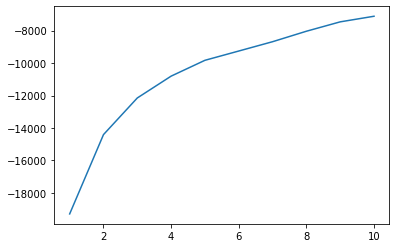

In [54]:
plt.plot(range(1,11),scores)

In [56]:
breadbasket["cluster"] = kmeans[5].predict(X)

In [65]:
dummies = breadbasket.iloc[:,1:-1]

In [67]:
import numpy as np

In [68]:
breadbasket["cat"] = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

In [70]:
pd.crosstab(breadbasket.cat,breadbasket["cluster"])

cluster,0,1,2,3,4,5
cat,,,,,,
beverage,1016,713,408,301,422,418
bread,651,423,249,189,240,263
breakfast,38,15,11,14,15,11
breakfast_pastry,368,221,134,101,138,174
condiments,35,32,18,12,20,13
dessert,378,270,141,112,146,181
kids,24,9,0,0,4,6
lunch,135,108,53,32,68,59
other,351,244,141,86,139,144


In [ ]:
breadbasket["hour"] = breadbasket["DateTime"].dt.hour
breadbasket["day"] = breadbasket["DateTime"].dt.dayofweek
breadbasket = breadbasket.drop(columns=["cat","cluster"])


In [75]:
breadbasket.head()

,DateTime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,hour,day
Transaction,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0,9,6
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0,10,6
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0,10,6
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0,10,6
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0,10,6


In [77]:
X = breadbasket.iloc[:,1:]

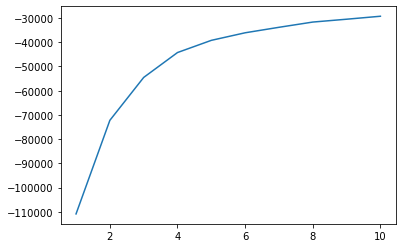

In [78]:
kmeans = [KMeans(i) for i in range(1,11)]
scores = [m.fit(X).score(X) for m in kmeans]
plt.plot(range(1,11),scores);

In [79]:
k = 4
col = "hour"
cluster = kmeans[k].predict(X)
pd.crosstab(breadbasket[col],cluster)

col_0,0,1,2,3,4
hour,,,,,
1,0,0,0,1,0
7,0,0,7,9,0
8,0,0,143,232,0
9,0,0,372,635,0
10,0,0,443,824,0
11,962,0,483,0,0
12,847,0,500,0,0
13,738,0,0,0,425
14,0,730,0,0,400


In [80]:
breadbasket["cat"] = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

In [81]:
k = 4
col = "cat"
cluster = kmeans[k].predict(X)
pd.crosstab(breadbasket[col],cluster)

col_0,0,1,2,3,4
cat,,,,,
beverage,869,611,676,601,521
bread,557,397,388,344,329
breakfast,19,23,20,20,22
breakfast_pastry,306,233,216,210,171
condiments,32,23,24,29,22
dessert,343,210,275,206,194
kids,7,2,19,7,8
lunch,105,100,93,90,67
other,299,221,227,191,167


In [82]:
k = 4
col = "day"
cluster = kmeans[k].predict(X)
pd.crosstab(breadbasket[col],cluster)

col_0,0,1,2,3,4
day,,,,,
0,0,0,650,0,485
1,0,0,672,0,531
2,0,1,626,3,491
3,502,397,0,353,0
4,586,433,0,469,0
5,814,652,0,602,0
6,645,345,0,274,0


In [85]:
breadbasket["cluster"] = cluster
breadbasket.head()

,DateTime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,hour,day,cat,cluster
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0,9,6,bread,3
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0,10,6,beverage,3
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0,10,6,condiments,3
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0,10,6,dessert,3
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0,10,6,breakfast_pastry,3


In [91]:
breadbasket.groupby("cluster").cat.value_counts()

cluster  cat             
0        beverage            869
         bread               557
         dessert             343
         breakfast_pastry    306
         other               299
         lunch               105
         condiments           32
         breakfast            19
         snacks               10
         kids                  7
1        beverage            611
         bread               397
         breakfast_pastry    233
         other               221
         dessert             210
         lunch               100
         breakfast            23
         condiments           23
         snacks                8
         kids                  2
2        beverage            676
         bread               388
         dessert             275
         other               227
         breakfast_pastry    216
         lunch                93
         condiments           24
         breakfast            20
         kids                 19
         snacks  

In [96]:
bb1 = bb1.reset_index(level=["DateTime"])
breadbasket["Item"] = bb1["Item"]

In [99]:
exploded = breadbasket.explode("Item")

In [110]:
a = exploded.groupby("cluster").Item.value_counts()
b = a.to_frame("counts").reset_index()
b = b.set_index("Item")
b.groupby("cluster")["counts"].nlargest(5)

cluster  Item     
0        Coffee       1494
         Bread         909
         Tea           326
         NONE          295
         Sandwich      294
1        Coffee        975
         Bread         566
         Tea           365
         Cake          325
         Sandwich      176
2        Coffee       1217
         Bread         672
         Pastry        267
         Tea           247
         NONE          151
3        Coffee        986
         Bread         735
         Pastry        283
         Medialuna     224
         Tea           169
4        Coffee        799
         Bread         443
         Tea           328
         Cake          234
         Sandwich      187
Name: counts, dtype: int64